# CNN classification of soot in TEM images

This notebook demonstrates the use of the trained convolutional neural network to classify images. Start by importing the relevant packages. 

In [1]:
# Import relevant packages
import os
from glob import glob
import ntpath # import an extra package used to get file names
from pathlib import Path # used to create results folder, if doesn't exist
import sys

import numpy as np
import matplotlib # used to save images
from PIL import Image
from tqdm import tqdm  # used for progress bar in loops

sys.path.append("..") # allow for importing images up a directory
from wrapper import single_image, multi_image # segmenter for multiple images
from visualization import plot_binary_grid # import visualization method

Next, let us specify paths to the input images, which are specified using the image_paths varible. By default, this code will consider an images in the test_images folder. Finish this section by applying the classifier to a single image and visualize the result. The provided image path is the default and will also result if no arguement is passed to the classifier, i.e., `mask = single_image(image_path)` will be identical to `mask = single_image()`.

Classifying image...
Complete.


<Figure size 432x288 with 0 Axes>

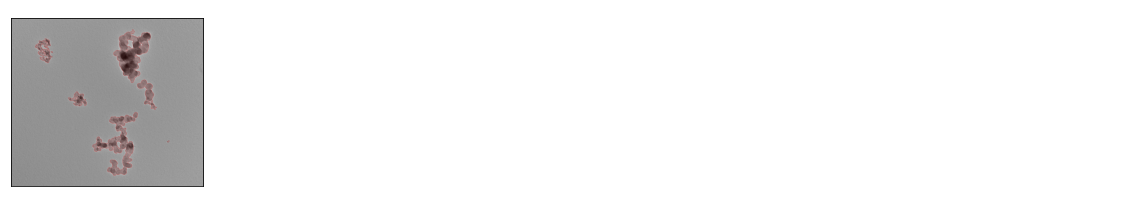

In [2]:
# Define the path to the image.
image_path = os.path.join("..", "test_images", "201805A_A6_004.png")
image = Image.open(image_path).convert("RGB") # open image
image = np.asarray(image) # convert image to numpy array

# Apply segmenter to default test images.
print("Classifying image...")
mask = single_image(image_path)
print("Complete.")

# Display result.
plot_binary_grid([mask], [image_path]) # note that the mask is contained in a []

We can similiarily apply the function across a range of images. The path here is again identical to the default. 

Classifying images...


100%|██████████| 6/6 [02:42<00:00, 27.04s/it]


Complete.


<Figure size 432x288 with 0 Axes>

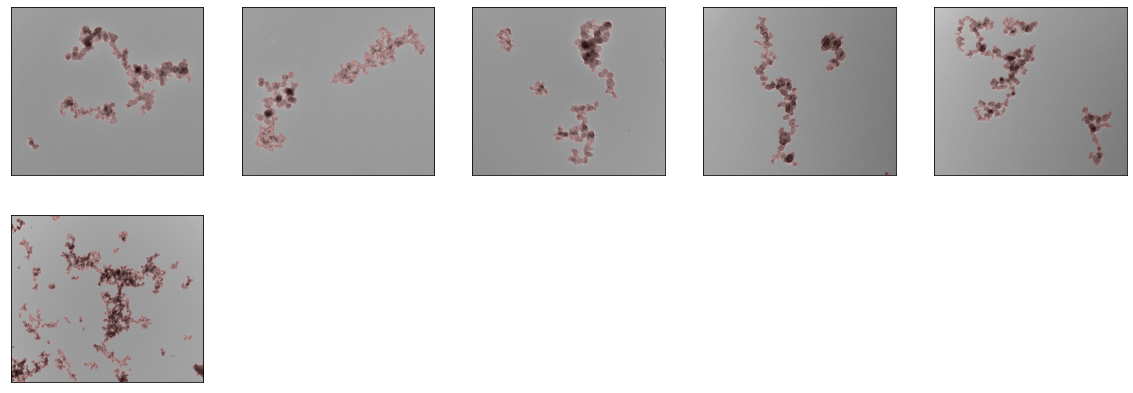

In [3]:
# Define the path to the image.
data_dir = os.path.join("..", "test_images")
image_paths = glob(os.path.join(data_dir, "*.*"))

# Apply segmenter to default test images.
print("Classifying images...")
masks = multi_image(image_paths, device="cpu") # device="cuda" will be faster
print("Complete.")

# Display result.
plot_binary_grid(masks, image_paths)

Finally, save the images to the results folder. 

In [4]:
# Ouput binary images by saving to the results folder.
Path("../results").mkdir(parents=True, exist_ok=True)

ii = 0
for image_path in tqdm(image_paths):
    _, tail = ntpath.split(image_path)
    matplotlib.image.imsave('../results/' + tail, masks[ii], format='tiff')
    ii = ii+1

print('Complete: Images saved to results/ folder.')

100%|██████████| 6/6 [00:01<00:00,  5.21it/s]

Complete: Images saved to results/ folder.
